

# Melbourne Housing Price Analysis

  #### H0: There is no statistical significance about the relationship between Melbourne's housing price and the various features used to describe a house
  #### HA: House features such as neighbourhoods, number of bedrooms/bathrooms, and land size etc hold significant predicting power on the price of a house 

In [282]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk
import scipy.stats
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import chi2
from arch import arch_model
import pylab
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import sys
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest
from sklearn import feature_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse,accuracy_score
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten,Dropout,Activation
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import SGD, Adam,Adagrad,RMSprop

In [176]:
housing=pd.read_csv(r'C:\Machine Learning Brainstation\Melbourne_housing_FULL.csv')
pd.set_option('display.max_columns',None)
housing.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,3.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [177]:
housing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [178]:
housing.Postcode.astype('object')

0        3067
1        3067
2        3067
3        3067
4        3067
         ... 
34852    3013
34853    3013
34854    3013
34855    3013
34856    3013
Name: Postcode, Length: 34857, dtype: object

In [179]:
housing.shape

(34857, 21)

   ####      Check for missing data

In [180]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [181]:
housing[housing.isnull().any(axis=1)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34848,Wollert,16 Gunther Wy,4,h,621000.0,S,hockingstuart,24/02/2018,25.5,3750.0,4.0,2.0,2.0,375.0,NaN,NaN,Whittlesea City Council,-37.61331,145.03412,Northern Metropolitan,2940.0
34850,Wollert,15 Rockgarden Wy,3,h,NaN,SP,LJ,24/02/2018,25.5,3750.0,3.0,2.0,2.0,268.0,135.0,2016.0,Whittlesea City Council,-37.61094,145.04281,Northern Metropolitan,2940.0
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,24/02/2018,6.3,3013.0,3.0,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0



### Drop missing data:

#### Drop the 'Building Area' and 'YearBuilt' columns, too many missing values
#### Drop rows with >= 1/3 null values 
#### Drop rows with NAs in Prices

In [182]:
housing.drop(axis=1,columns=['BuildingArea','YearBuilt'],inplace=True)
housing.dropna(inplace=True,thresh=14)
housing.dropna(subset=['Price'],inplace=True)
housing.fillna({'Bedroom2':0,'Bathroom':0,'Car':0},inplace=True)
housing

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,24/02/2018,6.3,3013.0,3.0,1.0,0.0,288.0,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [183]:
housing.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

#### Check the data distribution on some categorical features

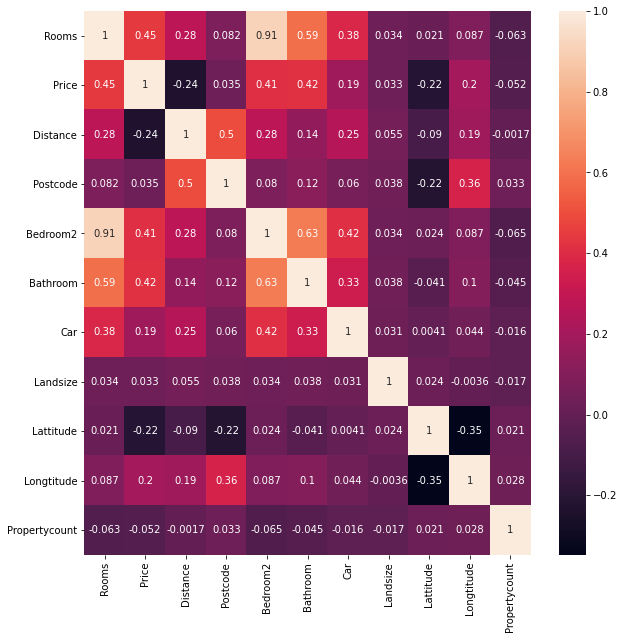

In [184]:
plt.figure(figsize=(10,10))
sns.heatmap(housing.corr(),annot= True)

Text(0.5, 1.0, 'Regionname & House Price')

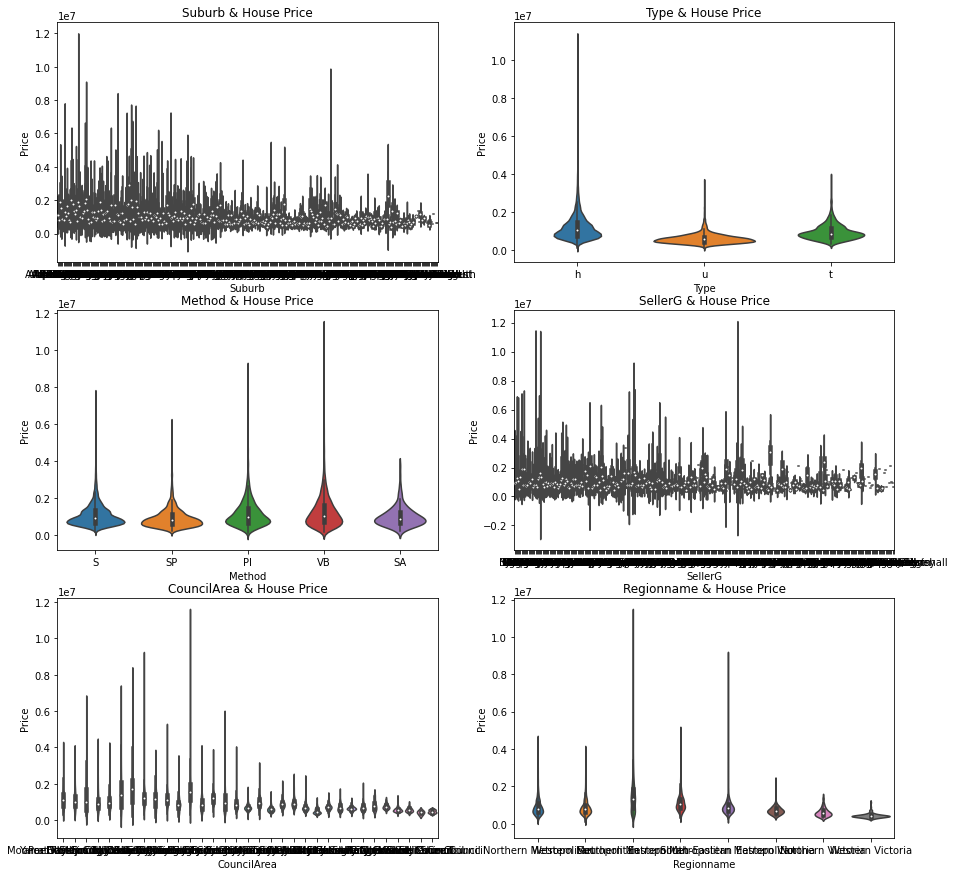

In [185]:
fig, axes = plt.subplots(3,2, figsize = (15,15))

sns.violinplot(data = housing, x = 'Suburb', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Suburb')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Suburb & House Price')

sns.violinplot(data=housing, x = 'Type', y = 'Price', ax = axes[0,1])
axes[0,1].set_xlabel('Type')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Type & House Price')

sns.violinplot(data=housing, x = 'Method', y = 'Price', ax = axes[1,0])
axes[1,0].set_xlabel('Method')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Method & House Price')

sns.violinplot(data=housing, x = 'SellerG', y = 'Price', ax = axes[1,1])
axes[1,1].set_xlabel('SellerG')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('SellerG & House Price')

sns.violinplot(data=housing, x = 'CouncilArea', y = 'Price', ax = axes[2,0])
axes[2,0].set_xlabel('CouncilArea')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('CouncilArea & House Price')

sns.violinplot(data=housing, x = 'Regionname', y = 'Price', ax = axes[2,1])
axes[2,1].set_xlabel('Regionname')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('Regionname & House Price')

#### Check the price distribution for differnt regions 

Text(0.5, 1.0, 'Western Victoria')

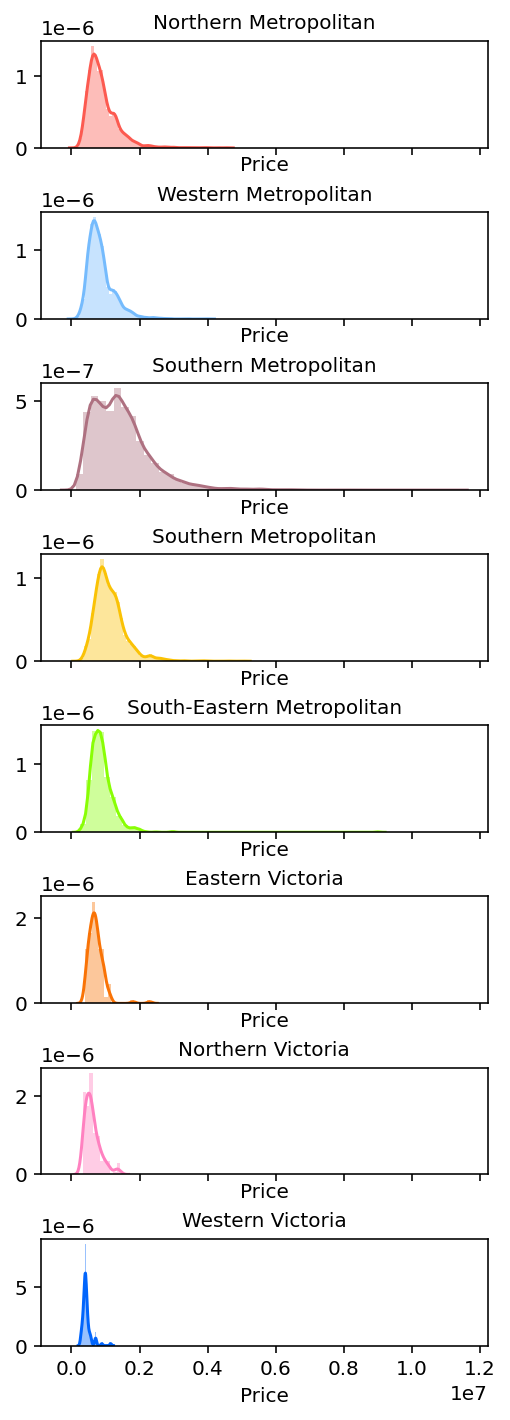

In [186]:
fig,axes = plt.subplots(8,1, figsize=(4,12), dpi=144,sharex=True,sharey=False)
plt.subplots_adjust(hspace=0.6)
sns.distplot(housing[housing.Regionname=='Northern Metropolitan']['Price'],ax=axes[0],color="xkcd:coral").set_title("Northern Metropolitan",size=10)
sns.distplot(housing[housing.Regionname=='Western Metropolitan']['Price'],ax=axes[1],color='xkcd:sky blue').set_title("Western Metropolitan",size=10)
sns.distplot(housing[housing.Regionname=='Southern Metropolitan']['Price'],ax=axes[2],color='xkcd:mauve').set_title("Southern Metropolitan",size=10)
sns.distplot(housing[housing.Regionname=='Eastern Metropolitan']['Price'],ax=axes[3],color='xkcd:goldenrod').set_title("Southern Metropolitan",size=10)
sns.distplot(housing[housing.Regionname=='South-Eastern Metropolitan']['Price'],ax=axes[4],color='xkcd:lime green').set_title("South-Eastern Metropolitan",size=10)
sns.distplot(housing[housing.Regionname=='Eastern Victoria']['Price'],ax=axes[5],color='xkcd:orange').set_title("Eastern Victoria",size=10)
sns.distplot(housing[housing.Regionname=='Northern Victoria']['Price'],ax=axes[6],color='xkcd:pink').set_title("Northern Victoria",size=10)
sns.distplot(housing[housing.Regionname=='Western Victoria']['Price'],ax=axes[7],color='xkcd:bright blue').set_title("Western Victoria",size=10)



In [187]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [188]:
housing.CouncilArea.unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Whittlesea City Council', 'Frankston City Council',
       'Macedon Ranges Shire Council', 'Yarra Ranges Shire Council',
       'Wyndham City Council', 'Cardinia Shire Council',
       'Moorabool Shire Council', 'Mitchell Shire Council'], dtype=object)

In [189]:
housing=pd.get_dummies(housing,columns=['Method','CouncilArea','Regionname'])
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'Lattitude', 'Longtitude', 'Propertycount', 'Method_PI', 'Method_S',
       'Method_SA', 'Method_SP', 'Method_VB',
       'CouncilArea_Banyule City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Frankston City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Greater Dandenong City Council',
       'CouncilArea_Hobsons Bay City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Kingston City Council', 'CouncilArea_Knox City Council',
       'CouncilArea_Macedon Ranges Shire Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Maribyrnong City Counci

#### Decide the features to keep

In [190]:
housing.drop(columns=['Suburb','Address','Type','SellerG','Postcode'],inplace=True)

In [191]:
numerical_features=['Rooms','Distance','Bedroom2','Bathroom','Car','Propertycount']
categorical_features=[
       'Method_PI', 'Method_S',
       'Method_SA', 'Method_SP', 'Method_VB',
       'CouncilArea_Banyule City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Frankston City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Greater Dandenong City Council',
       'CouncilArea_Hobsons Bay City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Kingston City Council', 'CouncilArea_Knox City Council',
       'CouncilArea_Macedon Ranges Shire Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Maribyrnong City Council',
       'CouncilArea_Maroondah City Council',
       'CouncilArea_Melbourne City Council', 'CouncilArea_Melton City Council',
       'CouncilArea_Mitchell Shire Council', 'CouncilArea_Monash City Council',
       'CouncilArea_Moonee Valley City Council',
       'CouncilArea_Moorabool Shire Council',
       'CouncilArea_Moreland City Council',
       'CouncilArea_Nillumbik Shire Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Whitehorse City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Yarra City Council',
       'CouncilArea_Yarra Ranges Shire Council',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria']
all_features=numerical_features+categorical_features

#### Check the MI score on numerical and categorical features

In [192]:
from sklearn import feature_selection
features_importances_numerical=feature_selection.mutual_info_regression(housing[numerical_features],housing['Price'])
features_importances_numerical

array([0.17952969, 0.29807977, 0.16622284, 0.10351322, 0.06277514,
       0.28804203])

In [193]:
feat_importances_numerical = pd.DataFrame(np.column_stack((np.array(numerical_features),features_importances_numerical)),columns=['features','importance'])
feat_importances_numerical.sort_values('importance',inplace=True,ascending=False)
feat_importances_numerical

,features,importance
1,Distance,0.2980797671047064
5,Propertycount,0.2880420300665758
0,Rooms,0.17952969096536453
2,Bedroom2,0.1662228375691739
3,Bathroom,0.10351321541664804
4,Car,0.06277513734348128


In [194]:
feat_importance_categorical = pd.DataFrame(np.column_stack((np.array(categorical_features),features_importances_categorical)),columns=['features','importance'])
feat_importance_categorical.sort_values('importance',inplace=True,ascending=False)
top10_categorical_features=[x for x in feat_importance_categorical.iloc[0:9]['features']]
top10_categorical_features
feat_importance_categorical

,features,importance
43,Regionname_Southern Metropolitan,0.08774830079012164
1,Method_S,0.07928390811105102
4,Method_VB,0.07175347233939222
7,CouncilArea_Boroondara City Council,0.04806821501552516
0,Method_PI,0.03221648094398866
8,CouncilArea_Brimbank City Council,0.028061239640968516
44,Regionname_Western Metropolitan,0.026345498792557542
6,CouncilArea_Bayside City Council,0.024258091405785054
16,CouncilArea_Hume City Council,0.023025974848283948
35,CouncilArea_Wyndham City Council,0.022333537994884134


#### Leave out the last feature 'car' based on the MI ranking for num_features

In [195]:
selected_features=['Distance','Propertycount','Rooms','Bedroom2']+categorical_features

In [196]:
from sklearn.model_selection import train_test_split
split=0.4
X_trn, X_tst, Y_trn, Y_tst = train_test_split(housing[selected_features], housing['Price'], test_size=split, random_state=77)
scaler = StandardScaler()
scaler.fit(X_trn)
X_trn = scaler.transform(X_trn)
X_tst = scaler.transform(X_tst)

In [197]:
from sklearn.metrics import mean_squared_error
linear=sk.linear_model.LinearRegression()
model=linear.fit(X_trn,Y_trn)
Y_pred=model.predict(X_tst)
LR=mean_squared_error(Y_tst,Y_pred)
print("The Mean Squared Error for linear regression model on the testing dataset is:", str(mean_squared_error(Y_tst,Y_pred)))
print("The R square score on the trainnign dataset is:", str(model.score(X_trn,Y_trn)))
print("The R square score on the trainnign dataset is:", str(model.score(X_tst,Y_tst)))

The Mean Squared Error for linear regression model on the testing dataset is: 200476826397.63486
The R square score on the trainnign dataset is: 0.5387460350421966
The R square score on the trainnign dataset is: 0.5283513134694549


In [198]:
ridge=sk.linear_model.Ridge(alpha=5000)
ridge_model=ridge.fit(X_trn,Y_trn)
Y_ridge_pred=ridge_model.predict(X_tst)
RR=mean_squared_error(Y_tst,Y_ridge_pred)
print("The Mean Squared Error for ridge model on the testing dataset is:", str(mean_squared_error(Y_tst,Y_ridge_pred)))
print("The R square score on the trainning dataset is:", str(ridge_model.score(X_trn,Y_trn)))
print("The R square score on the trainning dataset is:", str(ridge_model.score(X_tst,Y_tst)))

The Mean Squared Error for ridge model on the testing dataset is: 214438719156.30206
The R square score on the trainning dataset is: 0.5040410383085372
The R square score on the trainning dataset is: 0.4955040836951541


In [199]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {"C": [0.1, 0.5,1],"epsilon": [0.001,0.01,0.1],
              "kernel": ['rbf','linear']}

##Search for the best parameters in SVR
SVR_model=SVR()
Grid_Search=GridSearchCV(SVR_model,param_grid, cv=3)
Grid_Search.fit(X_trn,Y_trn)
print(Grid_Search.best_params_)
SVR_best_model=Grid_Search.best_estimator_
Y_SVR_pred=SVR_best_model.predict(X_tst)

SVR=mean_squared_error(Y_tst,Y_SVR_pred)
print("The Mean Squared Error for SVR model on the testing dataset is:", str(mean_squared_error(Y_tst,Y_SVR_pred)))
print("Accuracy on the trainning dataset is: ", SVR_best_model.score(X_trn,Y_trn))
print("Accuracy on the testing dataset is: ", SVR_best_model.score(X_tst, Y_tst))

{'C': 1, 'epsilon': 0.001, 'kernel': 'linear'}
The Mean Squared Error for SVR model on the testing dataset is: 443830198064.74927
Accuracy on the trainning dataset is:  -0.043995396729009206
Accuracy on the testing dataset is:  -0.04417021019991707


In [200]:
DT_model=tree.DecisionTreeRegressor(max_depth=5, min_samples_leaf=50)
DT_model.fit(X_trn,Y_trn)
Y_DT_pred=DT_model.predict(X_tst)
DT=mean_squared_error(Y_tst,Y_DT_pred)
print("The Mean Squared Error for Decision Tree model on the testing dataset is:", str(mean_squared_error(Y_tst,Y_DT_pred)))
print("Accuracy on the trainning dataset is: ", DT_model.score(X_trn,Y_trn))
print("Accuracy on the testing dataset is: ", DT_model.score(X_tst, Y_tst))

The Mean Squared Error for Decision Tree model on the testing dataset is: 182185003604.00168
Accuracy on the trainning dataset is:  0.5921989391352581
Accuracy on the testing dataset is:  0.5713852857738387


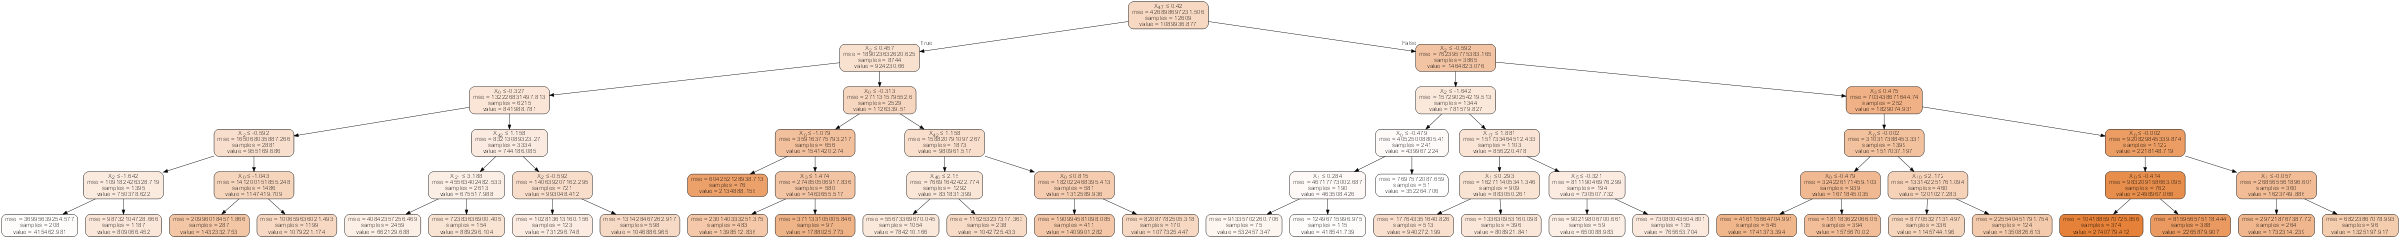

In [201]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DT_model,out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.set_size('"25,25!"')
Image(graph.create_png())

In [202]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model=RandomForestRegressor(max_depth=5,n_estimators=100)
random_forest_model.fit(X_trn,Y_trn)
Y_RF_pred=random_forest_model.predict(X_tst)
RF=mean_squared_error(Y_tst,Y_RF_pred)
print("The Mean Squared Error for Decision Tree model on the testing dataset is:", str(mean_squared_error(Y_tst,Y_RF_pred)))
print("The score on the trainning dataset is: ", random_forest_model.score(X_trn,Y_trn))
print("The score on the testing dataset is: ", random_forest_model.score(X_tst,Y_tst))

The Mean Squared Error for Decision Tree model on the testing dataset is: 171652940967.87125
The score on the trainning dataset is:  0.6207164630747446
The score on the testing dataset is:  0.59616337907294


In [203]:
from sklearn.ensemble import GradientBoostingRegressor
GBR_model=GradientBoostingRegressor(max_depth=5,n_estimators=100)
GBR_model.fit(X_trn,Y_trn)
GBR_model_pred=GBR_model.predict(X_tst)
Y_GBR_pred=GBR_model.predict(X_tst)
GBR=mean_squared_error(Y_tst,Y_GBR_pred)
print("The Mean Squared Error for Decision Tree model on the testing dataset is:", str(mean_squared_error(Y_tst,Y_GBR_pred)))
print("The score on the trainning dataset is: ", GBR_model.score(X_trn,Y_trn))
print("The score on the testing dataset is: ", GBR_model.score(X_tst,Y_tst))

The Mean Squared Error for Decision Tree model on the testing dataset is: 146038831525.40253
The score on the trainning dataset is:  0.727319251840549
The score on the testing dataset is:  0.6564240151388177


In [222]:
## ANN model with L2 regularization
## adding more than one hidden layer didn't result in a higher prediction score

from sklearn.metrics import r2_score

ANN_model=Sequential()
ANN_model.add(Dense(6, input_shape=(X_trn.shape[1],),activation='tanh', kernel_regularizer='l2'))
ANN_model.add(Dense(6,activation='sigmoid'))
ANN_model.add(Dense(1, activation='relu'))
ANN_model.compile(Adam(lr=6),"mse", metrics=["accuracy"])

ANN_model.fit(X_trn, Y_trn, epochs=100)
Y_ANN_pred_trn=ANN_model.predict(X_trn)
Y_ANN_pred_tst=ANN_model.predict(X_tst)
ANN=mean_squared_error(Y_tst,Y_ANN_pred_tst)
print("The Mean Squared Error for ANN model on the testing dataset is:", str(mean_squared_error(Y_tst,Y_ANN_pred_tst)))
print("The score on the trainning dataset is: ", r2_score(Y_trn,Y_ANN_pred_trn,))
print("The score on the testing dataset is: ", r2_score(Y_tst,Y_ANN_pred_tst))

Train on 12609 samples
Epoch 1/100
12609/12609 [==============================] - 1s 49us/sample - loss: 1596648419061.9500 - accuracy: 0.0000e+00
Epoch 2/100
12609/12609 [==============================] - 0s 33us/sample - loss: 1561191853418.9358 - accuracy: 0.0000e+00
Epoch 3/100
12609/12609 [==============================] - 0s 38us/sample - loss: 1526662309221.9004 - accuracy: 0.0000e+00
Epoch 4/100
12609/12609 [==============================] - 0s 33us/sample - loss: 1492901966540.2883 - accuracy: 0.0000e+00
Epoch 5/100
12609/12609 [==============================] - 0s 33us/sample - loss: 1459890034534.1848 - accuracy: 0.0000e+00
Epoch 6/100
12609/12609 [==============================] - 0s 34us/sample - loss: 1427535846559.2563 - accuracy: 0.0000e+00
Epoch 7/100
12609/12609 [==============================] - 0s 32us/sample - loss: 1395765506924.1133 - accuracy: 0.0000e+00
Epoch 8/100
12609/12609 [==============================] - 0s 37us/sample - loss: 1364659909077.4045 - accura

In [ ]:
#ANN with dropout

In [276]:
ANN_model=Sequential()
ANN_model.add(Dense(6, input_shape=(X_trn.shape[1],),activation='tanh', kernel_regularizer='l2'))
ANN_model.add(Dense(6,activation='sigmoid'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1, activation='relu'))
ANN_model.compile(Adam(lr=6),"mse", metrics=["accuracy"])

ANN_model.fit(X_trn, Y_trn, epochs=60)
Y_ANN_pred_trn_DP=ANN_model.predict(X_trn)
Y_ANN_pred_tst_DP=ANN_model.predict(X_tst)
ANN_DP=mean_squared_error(Y_tst,Y_ANN_pred_tst_DP)
print("The Mean Squared Error for ANN model on the testing dataset is:", str(mean_squared_error(Y_tst,Y_ANN_pred_tst_DP)))
print("The score on the trainning dataset is: ", r2_score(Y_trn,Y_ANN_pred_trn_DP,))
print("The score on the testing dataset is: ", r2_score(Y_tst,Y_ANN_pred_tst_DP))

Train on 12609 samples
Epoch 1/60
12609/12609 [==============================] - 1s 49us/sample - loss: 1596460792574.8022 - accuracy: 0.0000e+00
Epoch 2/60
12609/12609 [==============================] - 0s 37us/sample - loss: 1561010105370.3940 - accuracy: 0.0000e+00
Epoch 3/60
12609/12609 [==============================] - 0s 35us/sample - loss: 1526480393354.6287 - accuracy: 0.0000e+00
Epoch 4/60
12609/12609 [==============================] - 0s 35us/sample - loss: 1493646350069.7874 - accuracy: 0.0000e+00
Epoch 5/60
12609/12609 [==============================] - 0s 34us/sample - loss: 1461022758680.2214 - accuracy: 0.0000e+00s - loss: 1467681012700.1187 - accuracy: 0.0000e+
Epoch 6/60
12609/12609 [==============================] - 0s 35us/sample - loss: 1428775690973.5051 - accuracy: 0.0000e+00
Epoch 7/60
12609/12609 [==============================] - 1s 41us/sample - loss: 1397427753436.5510 - accuracy: 0.0000e+00
Epoch 8/60
12609/12609 [==============================] - 0s 36us/s

In [287]:
##'RMSprop' optimizer
ANN_model=Sequential()
ANN_model.add(Dense(6, input_shape=(X_trn.shape[1],),activation='tanh', kernel_regularizer='l2'))
ANN_model.add(Dense(6,activation='sigmoid'))
ANN_model.add(Dense(1, activation='relu'))
ANN_model.compile(RMSprop(lr=6),"mse", metrics=["accuracy"])

ANN_model.fit(X_trn, Y_trn, epochs=100)
Y_ANN_pred_trn=ANN_model.predict(X_trn)
Y_ANN_pred_tst=ANN_model.predict(X_tst)
ANN_RMS=mean_squared_error(Y_tst,Y_ANN_pred_tst)
print("The Mean Squared Error for ANN model on the testing dataset is:", str(mean_squared_error(Y_tst,Y_ANN_pred_tst)))
print("The score on the trainning dataset is: ", r2_score(Y_trn,Y_ANN_pred_trn,))
print("The score on the testing dataset is: ", r2_score(Y_tst,Y_ANN_pred_tst))

Train on 12609 samples
Epoch 1/100
12609/12609 [==============================] - 1s 50us/sample - loss: 1596514674565.0452 - accuracy: 0.0000e+00
Epoch 2/100
12609/12609 [==============================] - 0s 38us/sample - loss: 1560432178462.1094 - accuracy: 0.0000e+00
Epoch 3/100
12609/12609 [==============================] - 0s 33us/sample - loss: 1525639444763.4294 - accuracy: 0.0000e+00
Epoch 4/100
12609/12609 [==============================] - 0s 32us/sample - loss: 1491362503961.3989 - accuracy: 0.0000e+00
Epoch 5/100
12609/12609 [==============================] - 0s 32us/sample - loss: 1457603881437.3630 - accuracy: 0.0000e+00
Epoch 6/100
12609/12609 [==============================] - 0s 32us/sample - loss: 1424422802111.9441 - accuracy: 0.0000e+00
Epoch 7/100
12609/12609 [==============================] - 0s 31us/sample - loss: 1391833112577.9490 - accuracy: 0.0000e+00
Epoch 8/100
12609/12609 [==============================] - 0s 32us/sample - loss: 1359852611988.5974 - accura

#### Compare the MSE on different models

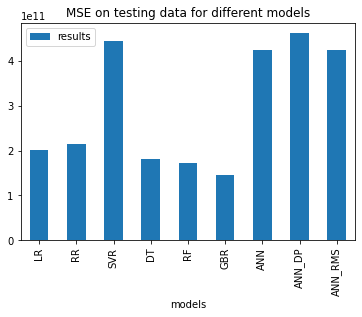

In [288]:
models=['LR','RR','SVR','DT','RF','GBR','ANN','ANN_DP','ANN_RMS']
results=[LR,RR,SVR,DT,RF,GBR,ANN,ANN_DP,ANN_RMS]
comparison=pd.DataFrame(list(zip(models,results)),columns=['models','results'])
comparison.plot(kind='bar', x='models',title='MSE on testing data for different models')

<BarContainer object of 50 artists>

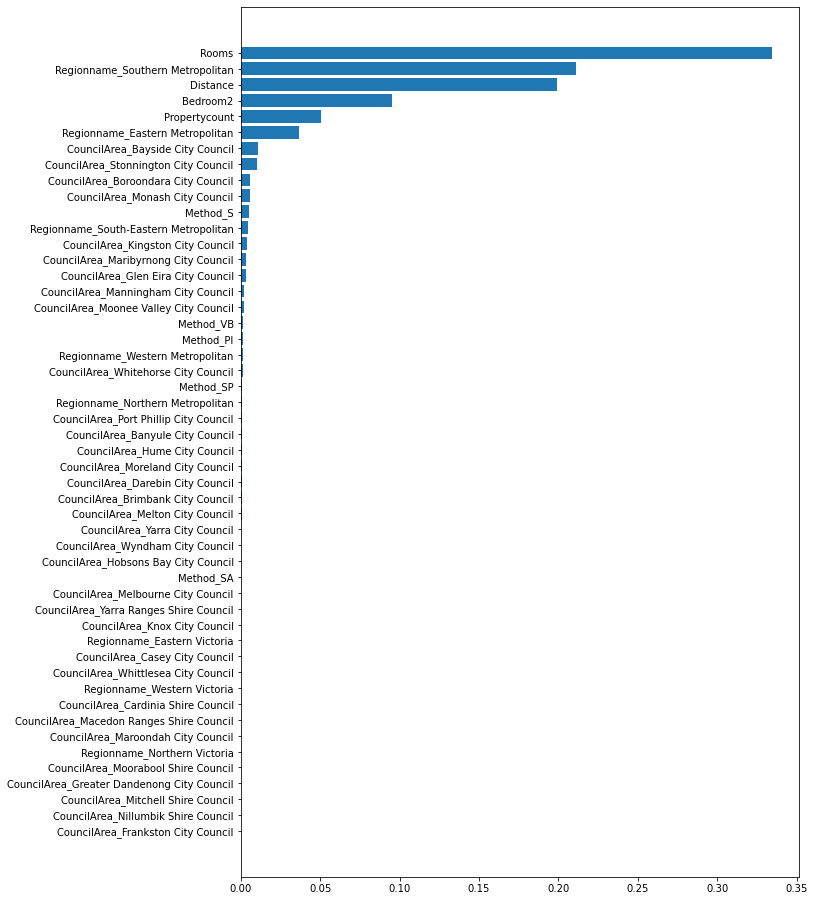

In [273]:
feature_importances_GBR = pd.DataFrame(list(zip(selected_features,GBR_model.feature_importances_)), columns=['Feature','Importance'])
feature_importances_GBR.sort_values(by='Importance', inplace=True)
plt.figure(figsize=[10,16])
plt.barh(feature_importances_GBR['Feature'],feature_importances_GBR['Importance'])